C:\Users\Trabalho\AppData\Local\Temp\ipykernel_18672\572511698.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


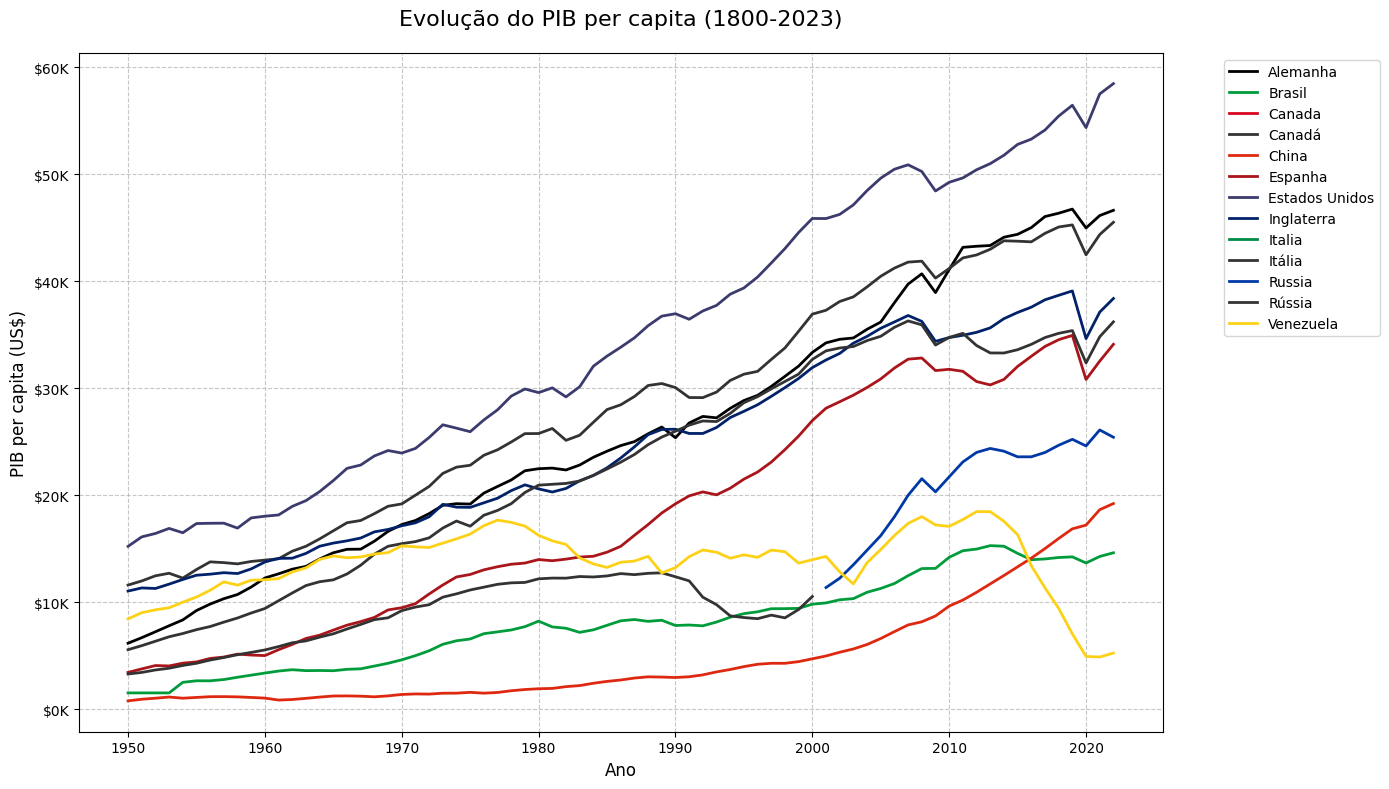

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pymysql
from matplotlib.ticker import FuncFormatter

# Configuração da conexão com o banco de dados MySQL
connection = pymysql.connect(
    host='localhost',
    user='root',
    password='',
    database='una_dados'
)

# Query para obter os dados de PIB per capita
query = """
SELECT year, country, gdp_per_capita 
FROM gdp_per_capita_by_country
WHERE country IN ('Brasil', 'China', 'Estados Unidos', 'Inglaterra', 'Venezuela', 
                 'Alemanha', 'Espanha', 'Italia', 'Canada', 'Russia')
ORDER BY year, country
"""

# Ler os dados para um DataFrame
df = pd.read_sql(query, connection)

# Fechar a conexão
connection.close()

# Preparar os dados para o gráfico
df_pivot = df.pivot(index='year', columns='country', values='gdp_per_capita')

# Filtrar para anos mais recentes (a partir de 1800 para melhor visualização)
df_pivot = df_pivot[df_pivot.index >= 1950]

# Criar o gráfico
plt.figure(figsize=(14, 8))

# Definir cores para cada país
colors = {
    'Brasil': '#009C3B',
    'China': '#DE2910',
    'Estados Unidos': '#3C3B6E',
    'Inglaterra': '#012169',
    'Venezuela': '#FCD116',
    'Alemanha': '#000000',
    'Espanha': '#AA151B',
    'Italia': '#008C45',
    'Canada': '#D80621',
    'Russia': '#0039A6'
}

# Plotar cada país
for country in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[country], label=country, color=colors.get(country, '#333333'), linewidth=2)

# Configurações do gráfico
plt.title('Evolução do PIB per capita (1950-2023)', fontsize=16, pad=20)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('PIB per capita (US$)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Formatar o eixo Y para mostrar valores em dólares
def thousands(x, pos):
    return '$%1.0fK' % (x*1e-3)

formatter = FuncFormatter(thousands)
plt.gca().yaxis.set_major_formatter(formatter)

# Adicionar legenda
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar layout para evitar cortes
plt.tight_layout()

# Mostrar o gráfico
plt.show()